In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
# import plotly.express as px

In [2]:
SDB = sqlite3.connect('VarlePigu.db')
Cs = SDB.cursor()

sql="""SELECT *
FROM "SaldytuvaiVarle";
"""
df = pd.read_sql_query(sql, con=SDB)

SDB.close()
cols = df.columns
for c in cols:
    print(c)

nuoroda
firstInfo
kaina
buvusiKaina
gamintojas
tipas
montavimo tipas
energijos klasė
talpa (l)
aukštis (cm)
modelio pavadinimas
spalva
bešerkšnė sistema
energijos vartojimo efektyvumo klasė (reglamentas (es) 2017/1369)
automatinis atitirpinimas
ore skleidžiamas akustinis triukšmas
big box
prijungti prietaisai su home connect
ore skleidžiamo akustinio triukšmo klasė
durelių vyris
durelių panelio pakeitimo galimybė
vyrių tipas
valdymo nustatymo ir signalizavimo įtaisų tipas
vidutinės metinės energijos sąnaudos kilovatvalandėmis per metus (kwh/m.)
atšaldymo kamerų tūrių suma
šaldymo temperatūros kamerų tūrių suma
klimato klasė
integruoti priedai
gaminio išmatavimai
minimalus montavimo nišos aukštis
maksimalus montavimo nišos aukštis
mažiausias montavimo angos plotis
didžiausias montavimo angos plotis
montavimo gylis
svoris neto
supercooling
superfreezing
low frost
vario zone
easyaccess lentynos
ecomode
pagrindinis jutiklinis valdymas
vario lentyna
itin tylūs prietaisai
lentynėlių skaičius

In [3]:
SDB = sqlite3.connect('VarlePigu.db')
Cs = SDB.cursor()

sql="""SELECT kaina,`šaldytuvų tipai`, tipas, `gaminio tipas`, `garsumo klasė`, `šaldiklio tipas`, 
`durų tipas`, `durų kiekis`, `šaldymo technologijos tipas`, `šaldytuvo tipas`
FROM "SaldytuvaiVarle";
"""
df = pd.read_sql_query(sql, con=SDB)
SDB.close()

In [4]:
lst = df['tipas'].tolist()
print(set(lst))

{'Laisvai pastatomas', 'Šaldytuvai su šaldikliu apačioje', 'Vienaduriai', 'Fridge with top freezer', 'Be kameros', 'Saugykla', 'Showcase', 'Fridge with freezer inside', 'Šaldytuvas', None, 'Su kamera apačioje', 'Lentynėlė', 'Šaldytuvai su šaldikliu viršuje', 'Šaldytuvas-Šaldytuvas', 'Dviduriai', 'Vitrina', 'Mini\n\nSu kamera viduje', 'Šaldikliai', 'Stačiai', 'Su kamera', 'Mini', 'Combi', 'Su kamera viduje', 'Šaldytuvai su šaldymo kamera', 'Mini\n\nBe kameros', 'Side by side', 'Šaldytuvas su apatiniu šaldikliu', 'Larder', 'Su kamera viršuje', 'Double door', 'Fridge without freezer', 'Pastatas'}


In [5]:
SDB = sqlite3.connect('VarlePigu.db')
Cs = SDB.cursor()

# sql="""SELECT kaina, `montavimo tipas`, `durų tipas`, `durų montavimas`, `šaldytuvų tipai`
# FROM "SaldytuvaiVarle";
# """

sql="""SELECT kaina, `montavimo tipas`
FROM "SaldytuvaiVarle";
"""
df = pd.read_sql_query(sql, con=SDB)

SDB.close()


In [6]:
df.columns

Index(['kaina', 'montavimo tipas'], dtype='object')

In [7]:
df.dropna(subset='montavimo tipas', inplace=True)
df.head()

,kaina,montavimo tipas
0,222,Laisvai statomi
1,170,Laisvai statomi
2,575.99,Įmontuojami
3,455,Laisvai statomi
4,450,Įmontuojami


In [8]:
tipai = set(df['montavimo tipas'].tolist())
print(tipai)

{'įmontuojama', 'Laisvai pastatoma', 'Laisvai statomi', 'N/a', 'Įmontuojami', 'Laisvai statoma', 'laisvai pastatoma', 'Pilnai įmontuojama', 'Integruota', 'Montuojami', 'Pastatytas', 'Laisvai pastatomos'}


In [9]:
def set_saldytuvo_tipas(x):
    if 'stat' in x:
        return 'Laivai pastatomi'
    elif 'montuo' in x:
        return 'Įmontuojami'
    elif 'ntegruo' in x:
        return 'Integruojami'
    else:
        return 'Kita'
    
df['mtipas'] =df['montavimo tipas'].apply(set_saldytuvo_tipas)
df['kaina'] = df['kaina'].apply(lambda x: float(x))
df.head()

,kaina,montavimo tipas,mtipas
0,222.00,Laisvai statomi,Laivai pastatomi
1,170.00,Laisvai statomi,Laivai pastatomi
2,575.99,Įmontuojami,Įmontuojami
3,455.00,Laisvai statomi,Laivai pastatomi
4,450.00,Įmontuojami,Įmontuojami


In [10]:

df1 = df[['kaina', 'mtipas']].groupby('mtipas').mean(numeric_only=True).reset_index()
# df1_gr = df1.groupby('mtipas').mean(numeric_only=True).reset_index()
df1

,mtipas,kaina
0,Integruojami,881.545333
1,Kita,686.454286
2,Laivai pastatomi,567.290346
3,Įmontuojami,958.291438


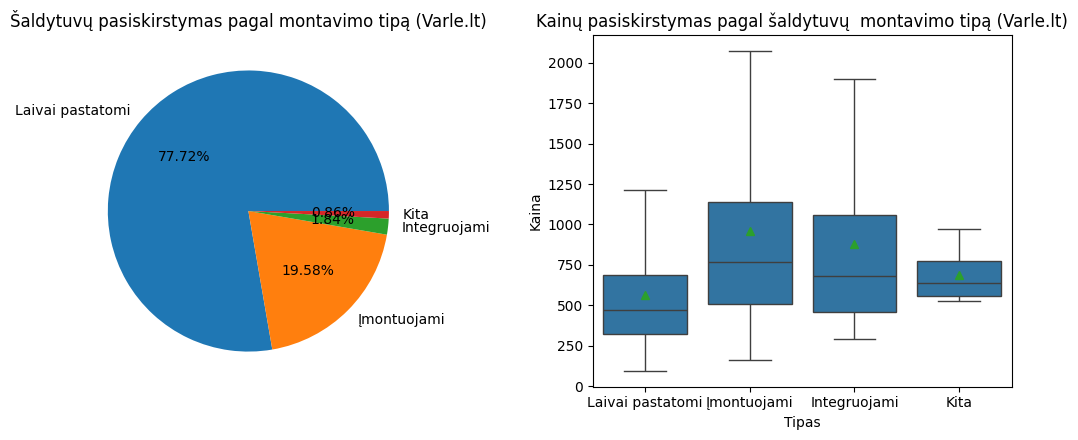

In [11]:
c =df['mtipas'].value_counts()
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(10.5, 4.5))
axis1.pie(c.values, labels=c.index, autopct='%.2f%%')
sns.boxplot(data=df, x='mtipas', y='kaina', showmeans=True, showfliers=False, ax=axis2)
axis1.set_title('Šaldytuvų pasiskirstymas pagal montavimo tipą (Varle.lt)')
axis2.set_title('Kainų pasiskirstymas pagal šaldytuvų  montavimo tipą (Varle.lt)')
axis2.set_xlabel('Tipas')
axis2.set_ylabel('Kaina')
fig.tight_layout()
plt.show()

In [12]:
SDB = sqlite3.connect('VarlePigu.db')
Cs = SDB.cursor()

sql="""SELECT `Šaldytuvo tipas:`
FROM "SaldytuvaiPigu";
"""
df = pd.read_sql_query(sql, con=SDB)
SDB.close()
lst = df['Šaldytuvo tipas:'].tolist()
print(set(lst))

{None, 'Mini šaldytuvas', 'Šaldytuvas be šaldiklio', 'Šaldytuvas su šaldikliu apačioje', 'Vitrininis šaldytuvas', 'Dviduris šaldytuvas', 'Įmontuojamas šaldytuvas', 'Šaldytuvas su šaldikliu viršuje'}


In [13]:
SDB = sqlite3.connect('VarlePigu.db')
Cs = SDB.cursor()

sql="""SELECT kaina, tipas
FROM "SaldytuvaiVarle";
"""
df = pd.read_sql_query(sql, con=SDB)
SDB.close()

In [14]:
df.dropna(subset='tipas', inplace=True)

def set_saldytuvo_tipas(x):
    # if 'labas' in x:
    #     return 'nar'
    if 'apa' in x:
        return 'Šaldytuvas su šaldikliu apačioje'
    elif 'virš' in x or 'with top' in x:
        return 'Šaldytuvas su šaldikliu viršuje'
    elif 'Mini' in x:
        return 'Mini'
    elif 'without' in x or 'Be k' in x:
        return 'Šaldytuvas be šaldiklio'
    elif 'kamera' in x or 'inside' in x:
        return 'Šaldytuvas su šaldikliu viduje'
    elif 'Dvid'in x or 'Double' in x:
        return 'Dviduriai šaldytuvai'
    elif 'stat' in x:
        return 'Laisvai pastatomas'
    else:
        return x
    
df['stipas'] =df['tipas'].apply(set_saldytuvo_tipas)

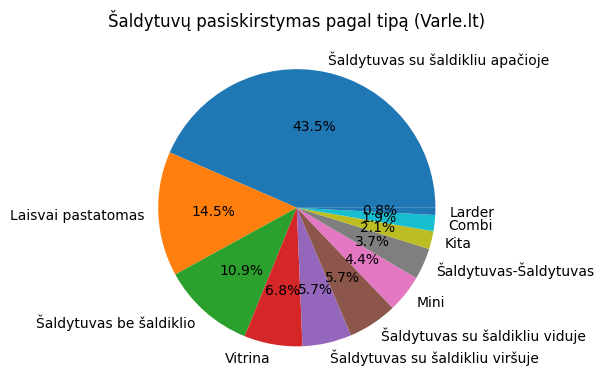

In [15]:
top = df['stipas'].value_counts().head(10).index.tolist()
df['stipas'] = df['stipas'].apply(lambda x: x if x in top else 'Kita')
c = df['stipas'].value_counts()

fig, ax = plt.subplots(figsize=(8, 4.5))
ax.pie(c.values, labels=c.index, autopct='%.1f%%')
plt.title('Šaldytuvų pasiskirstymas pagal tipą (Varle.lt)')
plt.show()

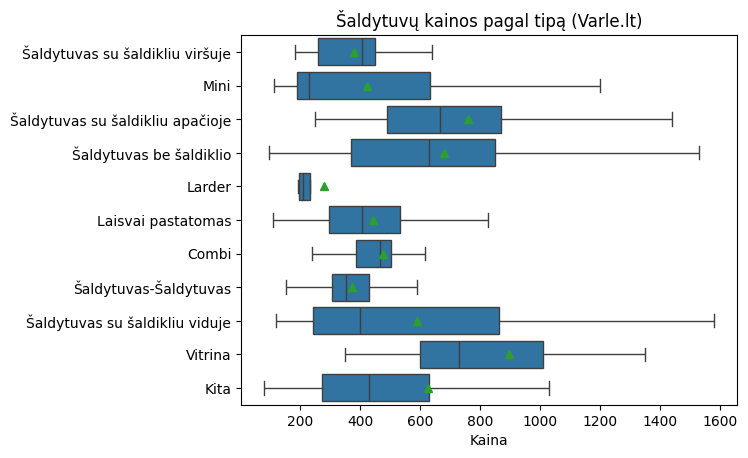

In [16]:
df['kaina'] = df['kaina'].apply(lambda x: float(x))
# kaina_gr =df[['kaina', 'stipas']].groupby('stipas').mean(numeric_only=True).round()

# sns.boxplot(data=kaina_gr, y='stipas', x='kaina', orient='h')
sns.boxplot(data=df, y='stipas', x='kaina', showmeans=True, showfliers=False)
plt.xlabel('Kaina')
plt.ylabel('')
plt.title('Šaldytuvų kainos pagal tipą (Varle.lt)')
plt.show()


In [17]:
SDB = sqlite3.connect('VarlePigu.db')
Cs = SDB.cursor()

sql="""SELECT kaina, `talpa (l)`, `naudinga šaldytuvo talpa`, `šaldytuvo talpa [l]`,
`bendra talpa neto`, `šaldytuvo talpa neto`, `šaldytuvo talpa`, `bendros grynosios talpos`, `bendra talpa`, `šaldymo talpa`,
`šaldytuvo neto talpa`, `bendra neto talpa`, `bendroji talpa neto`, `šaldytuvo talpa (neto)`,
`talpa (neto)`, `šaldytuvo talpa (l)`, `grynoji talpa`, `bendroji talpa neto (l)`, `šaldytuvo talpa neto (l)`
FROM "SaldytuvaiVarle";
"""
df = pd.read_sql_query(sql, con=SDB)
SDB.close()

In [18]:
for col in df.columns:
    if col != 'kaina':
        df['V'] = df['talpa (l)'].fillna(df[col])
    
df['kaina'] = df['kaina'].apply(lambda x: float(x))

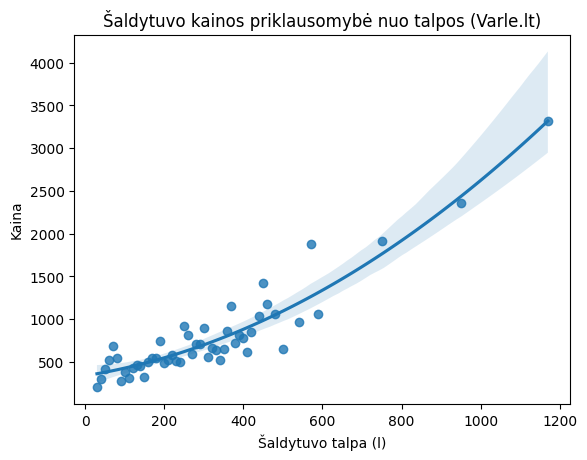

In [19]:
df.dropna(subset='V', inplace=True)
dfv = df[['kaina', 'V']]
dfv['V'] = df['V'].apply(lambda x: float(x))
dfv['Vgr'] = dfv['V'].apply(lambda x: int(np.ceil(x/10) * 10))

dfv_gr = dfv.groupby('Vgr').mean(numeric_only=True).round().reset_index()
dfv_gr.head()
sns.regplot(data=dfv_gr[dfv_gr['Vgr'] > 10], x='Vgr', y='kaina', order=2)
plt.title('Šaldytuvo kainos priklausomybė nuo talpos (Varle.lt)')
plt.ylabel('Kaina')
plt.xlabel('Šaldytuvo talpa (l)')
plt.show()

In [72]:
# energijos klase

SDB = sqlite3.connect('VarlePigu.db')
Cs = SDB.cursor()

sql="""SELECT kaina, 
`energijos klasė`, 
`energijos vartojimo efektyvumo klasė (reglamentas (es) 2017/1369)`,
`energijos efektyvumo klasė`
FROM "SaldytuvaiVarle";
"""
df = pd.read_sql_query(sql, con=SDB)
SDB.close()
df.head()

,kaina,energijos klasė,energijos vartojimo efektyvumo klasė (reglamentas (es) 2017/1369),energijos efektyvumo klasė
0,222,E,None,None
1,170,E,None,None
2,575.99,E,E,None
3,455,E,E,None
4,450,F,None,None


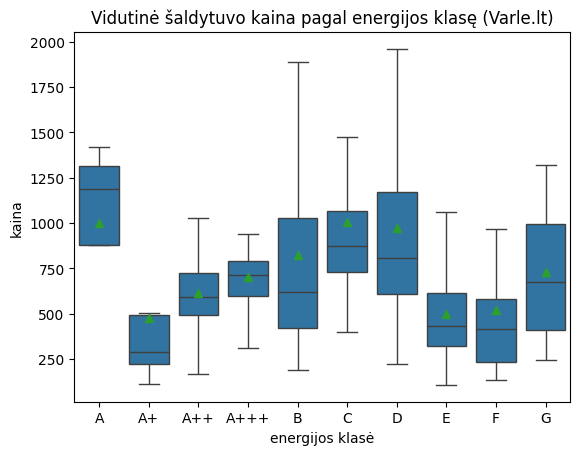

In [79]:

for col in df.columns:
    if col != 'kaina':
        df['energijos klasė'] = df['energijos klasė'].fillna(df[col])
 

    
df['energijos klasė'] = df['energijos klasė'].apply(lambda x: x.upper() if x is not None else x)
df['kaina'] = df['kaina'].apply(lambda x: float(x))
df.dropna(subset='energijos klasė', inplace=True)

klases = sorted(list(set(df['energijos klasė'].tolist())))
dfe = df[['kaina', 'energijos klasė']]

# dfe_gr = dfe.groupby('energijos klasė').mean(numeric_only=True).round().reset_index()
fig, ax = plt.subplots()
sns.boxplot(data=dfe, x='energijos klasė', y='kaina', showmeans=True, showfliers=False, order=klases)
# for container in ax.containers:
#     ax.bar_label(container)
plt.title('Vidutinė šaldytuvo kaina pagal energijos klasę (Varle.lt)')
plt.show()

In [22]:
# Energijos sanaudos

SDB = sqlite3.connect('VarlePigu.db')
Cs = SDB.cursor()

sql="""SELECT kaina, 
`vidutinės metinės energijos sąnaudos kilovatvalandėmis per metus (kwh/m.)`,
`metinės energijos sąnaudos`,
`metinis energijos suvartojimas (kwh)`,
`energijos suvartojimas per metus`,
`energijos sąnaudos`,
`metinis energijos suvartojimas`,
`suvartojama energija`,
`bendras suvartojamos energijos kiekis per metus`,
`energijos sąnaudos (kwh/metus)`,
`suvartojama energija (kwh)`,
`bendras suvartojamos energijos kiekis per metus (kwh)`,
`energijos sąnaudos per metus`
FROM "SaldytuvaiVarle";
"""
df = pd.read_sql_query(sql, con=SDB)
SDB.close()
df.head()

,kaina,vidutinės metinės energijos sąnaudos kilovatvalandėmis per metus (kwh/m.),metinės energijos sąnaudos,metinis energijos suvartojimas (kwh),energijos suvartojimas per metus,energijos sąnaudos,metinis energijos suvartojimas,suvartojama energija,bendras suvartojamos energijos kiekis per metus,energijos sąnaudos (kwh/metus),suvartojama energija (kwh),bendras suvartojamos energijos kiekis per metus (kwh),energijos sąnaudos per metus
0,222,None,None,None,None,None,None,None,None,None,None,None,None
1,170,None,None,None,None,None,None,None,None,None,None,None,None
2,575.99,234 kwh/annum,None,None,None,None,None,None,None,None,None,None,None
3,455,239 kwh/annum,None,None,None,None,None,None,None,None,None,None,None
4,450,None,None,None,None,None,None,None,None,None,None,None,None


In [23]:
for col in df.columns:
    if col != 'kaina':
        df['energija'] = df['metinės energijos sąnaudos'].fillna(df[col])

df['kaina'] = df['kaina'].apply(lambda x: float(x))
dfe = df[['kaina', 'energija']]
dfe.dropna(subset='energija', inplace=True)
dfe.head()

,kaina,energija
5,870.00,181
13,899.00,114
23,748.99,235
30,1579.99,164
44,685.68,215


In [24]:
dfe['energija'] = dfe['energija'].apply(lambda x: x.replace('kWh/metus', '').replace('kWh', '').replace(',', '.'))
dfe['energija'] = dfe['energija'].apply(lambda x: float(x))

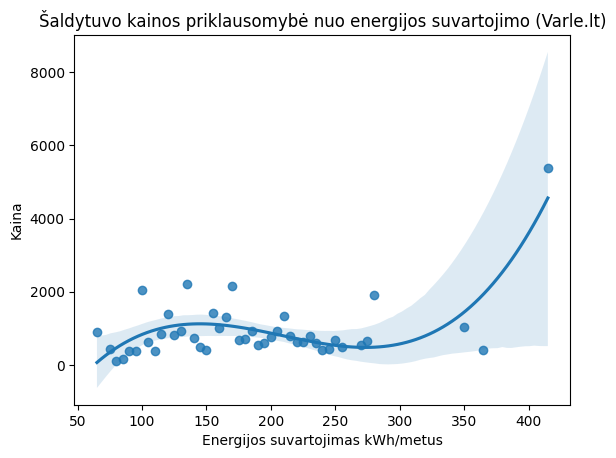

In [25]:

dfe['E'] = dfe['energija'].apply(lambda x: int(np.ceil(x/5) * 5))

dfe_gr = dfe.groupby('E').mean(numeric_only=True).round().reset_index()

sns.regplot(data=dfe_gr[dfe_gr['E'] < 500], x='E', y='kaina', order=3)
plt.title('Šaldytuvo kainos priklausomybė nuo energijos suvartojimo (Varle.lt)')
plt.ylabel('Kaina')
plt.xlabel('Energijos suvartojimas kWh/metus')
plt.show()

In [26]:
# garsas/triuksmas
SDB = sqlite3.connect('VarlePigu.db')
Cs = SDB.cursor()

sql="""SELECT kaina, 
`ore skleidžiamas akustinis triukšmas`,
`triukšmo lygis [db]`,
`maksimalus triukšmo lygis`,
`triukšmo lygis (db)`,
`triukšmo lygis`,
`triukšmo galia`,
`triukšmo lygis, db`,
`triukšmingumo lygis`,
`triukšmo lygis (db (a) re 1 pw)`,
`garso lygis`
FROM "SaldytuvaiVarle";
"""
df = pd.read_sql_query(sql, con=SDB)
SDB.close()
df.head()


,kaina,ore skleidžiamas akustinis triukšmas,triukšmo lygis [db],maksimalus triukšmo lygis,triukšmo lygis (db),triukšmo lygis,triukšmo galia,"triukšmo lygis, db",triukšmingumo lygis,triukšmo lygis (db (a) re 1 pw),garso lygis
0,222,None,None,None,None,None,None,None,None,None,None
1,170,None,None,None,None,None,None,None,None,None,None
2,575.99,35 db(a) re 1pw,None,None,None,None,None,None,None,None,None
3,455,42 db(a) re 1pw,None,None,None,None,None,None,None,None,None
4,450,None,None,None,None,None,None,None,None,None,None


In [ ]:
df['kaina'] = df['kaina'].apply(lambda x: float(x))
for col in df.columns:
    if col != 'kaina':
        df['garsas'] = df['ore skleidžiamas akustinis triukšmas'].fillna(df[col])

df.dropna(subset='garsas', inplace=True)
# df.head()

,kaina,ore skleidžiamas akustinis triukšmas,triukšmo lygis [db],maksimalus triukšmo lygis,triukšmo lygis (db),triukšmo lygis,triukšmo galia,"triukšmo lygis, db",triukšmingumo lygis,triukšmo lygis (db (a) re 1 pw),garso lygis,garsas
2,575.99,35 db(a) re 1pw,None,None,None,None,None,None,None,None,None,35 db(a) re 1pw
3,455.00,42 db(a) re 1pw,None,None,None,None,None,None,None,None,None,42 db(a) re 1pw
9,470.00,42 db(a) re 1pw,None,None,None,None,None,None,None,None,None,42 db(a) re 1pw
10,650.00,35 db(a) re 1pw,None,None,None,None,None,None,None,None,None,35 db(a) re 1pw
20,430.00,42 db(a) re 1pw,None,None,None,None,None,None,None,None,None,42 db(a) re 1pw


In [28]:
df['garsas'] = df['garsas'].apply(lambda x: int(x[:2]))

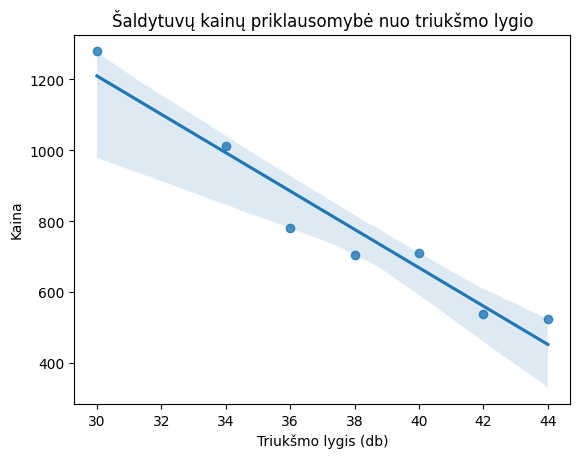

In [29]:
dfg = df[['kaina', 'garsas']]
dfg['g2'] = dfg['garsas'].apply(lambda x: int(np.ceil(x/2) * 2))

dfg_gr = dfg.groupby('g2').mean(numeric_only=True).round().reset_index()
fig, ax = plt.subplots()
sns.regplot(data=dfg_gr, x='g2', y='kaina', order=1)
ax.set_xlabel('Triukšmo lygis (db)')
ax.set_ylabel('Kaina')
plt.title('Šaldytuvų kainų priklausomybė nuo triukšmo lygio')
plt.show()

In [30]:
# valdymo pobūdis
SDB = sqlite3.connect('VarlePigu.db')
Cs = SDB.cursor()

sql="""SELECT kaina, 
`valdymas`,
`valdymo tipas`
FROM "SaldytuvaiVarle";
"""
df = pd.read_sql_query(sql, con=SDB)
SDB.close()
df.head()

,kaina,valdymas,valdymo tipas
0,222,None,None
1,170,None,None
2,575.99,None,None
3,455,None,None
4,450,None,None


In [31]:
df['kaina'] = df['kaina'].apply(lambda x: float(x))
df['valdymas'] = df['valdymas'].fillna(df['valdymo tipas'])
df.dropna(subset='valdymas', inplace=True)

In [32]:
def set_valdymas(x):
    if 'Elek' in x or 'Elec' in x or 'elek' in x:
        return 'Elektroninis'
    elif 'Palie' in x or 'Touch' in x or 'Juti' in x or 'juti' in x:
        return 'Sensorinis'
    elif 'Mech' in x or 'Meh' in x or 'Myg' in x or 'Rot' in x:
        return 'Mechaninis'
    elif 'Exter' in x:
        return 'External touch control LCD'
    elif 'varto' in x or 'rank' in x:
        return 'Kita'
    else:
        return x

df['newVald'] = df['valdymas'].apply(set_valdymas)


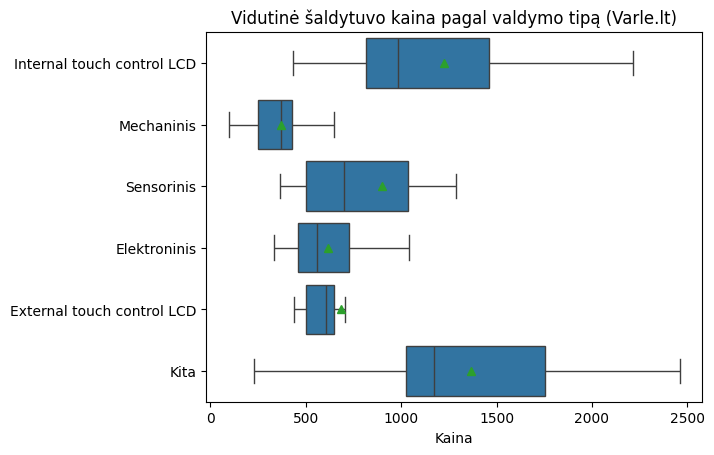

In [33]:
dfv = df[['kaina', 'newVald']]
# dfv_gr = dfv.groupby('newVald').mean(numeric_only=True).round().reset_index()

fig, ax = plt.subplots()
sns.boxplot(data=dfv, y='newVald', x='kaina', showmeans=True, showfliers=False)
# sns.barplot(data=dfv_gr, y='newVald', x='kaina', orient='h')
# for container in ax.containers:
#     ax.bar_label(container)
plt.ylabel('')
plt.xlabel('Kaina')
plt.title('Vidutinė šaldytuvo kaina pagal valdymo tipą (Varle.lt)')
plt.show()

In [34]:
# Gamintojai
SDB = sqlite3.connect('VarlePigu.db')
Cs = SDB.cursor()

sql="""SELECT kaina, 
gamintojas,
spalva,
`gaminio spalva`,
`produkto spalva`,
`korpuso spalva`
FROM "SaldytuvaiVarle";
"""
df = pd.read_sql_query(sql, con=SDB)
SDB.close()
df.head()

,kaina,gamintojas,spalva,gaminio spalva,produkto spalva,korpuso spalva
0,222,Sharp,None,None,None,None
1,170,Hisense,Juoda,None,None,None
2,575.99,Bosch,Balta,None,None,None
3,455,Bsh Fcli Cerkezkoy,Balta,None,None,None
4,450,Haier,Balta,None,None,None


In [35]:
for col in df.columns:
    if col not in ['kaina', 'gamintojas']:
        df['spalva'] = df['spalva'].fillna(df[col])

df['kaina'] = df['kaina'].apply(lambda x: float(x))

In [36]:
def set_spalva(x):
    if x is not None:
        if 'Balt' in x or 'balt' in x:
            return 'Balta'
        elif 'Pilk' in x or 'pilk' in x:
            return 'Pilka'
        elif 'Juod' in x or 'juod' in x:
            return 'Juoda'
        else:
            return x

df['spalva'] = df['spalva'].apply(set_spalva)

c= df['spalva'].value_counts()
c

spalva
Balta                     460
Juoda                     123
Sidabrinė                 110
Nerūdijantis plienas       76
Pilka                      65
Netaikoma                  17
Raudona                    16
Pilnai įmontuojama         12
Plienas                     6
Kreminė                     4
Ruda                        4
Violetinė                   4
sidabrinė                   3
Mėlyna                      3
grafito plieno              3
žalia                       3
metalinis grafitas          3
Kreminis                    3
Pelēka vai sudraba          2
tamsus inox                 2
Black (Glass)               2
Stainless steel             1
Biały                       1
Smėlio spalvos              1
dramblio kaulo              1
Žydra                       1
tamsiai mėlyna              1
Kreminė\n\nRuda             1
kreminė                     1
Nerūdijantysis plienas      1
Geltona                     1
platina                     1
grafitas                    1
Ant

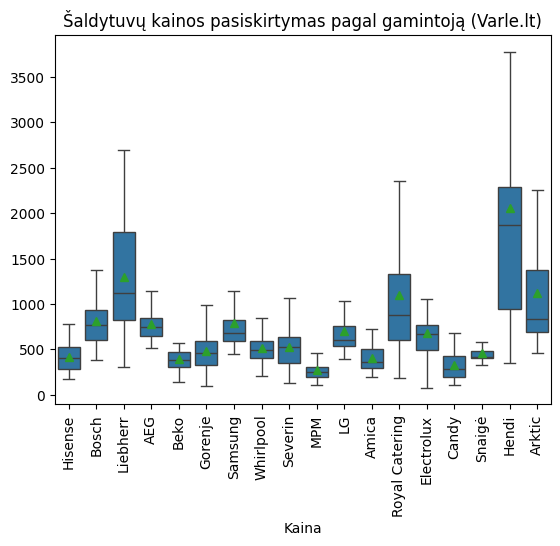

In [37]:
brand_counts = df['gamintojas'].value_counts()
brands_to_plot = brand_counts[brand_counts > 20].index

df_gamintojas = df[df['gamintojas'].isin(brands_to_plot)][['kaina', 'gamintojas']]
# df_gamintojas_gr = df_gamintojas.groupby('gamintojas').mean().round()
fig, ax = plt.subplots()
sns.boxplot(data=df_gamintojas, y='kaina', x='gamintojas', showfliers=False, showmeans=True)
plt.title('Šaldytuvų kainos pasiskirtymas pagal gamintoją (Varle.lt)')
plt.tick_params(axis='x', rotation=90)
plt.ylabel('')
plt.xlabel('Kaina')
plt.show()


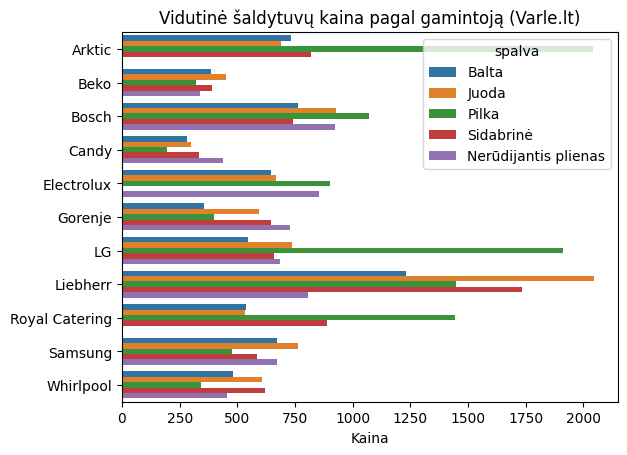

In [38]:
colors_counts = df['spalva'].value_counts()
colors_to_plot = colors_counts[colors_counts > 40].index
brand_counts = df['gamintojas'].value_counts()
brands_to_plot = brand_counts[brand_counts > 40].index

df_gamintojas = df[(df['gamintojas'].isin(brands_to_plot)) & df['spalva'].isin(colors_to_plot)][['kaina', 'gamintojas', 'spalva']]
df_gamintojas_gr = df_gamintojas.groupby(['gamintojas', 'spalva']).mean().round()
fig, ax = plt.subplots()
sns.barplot(data=df_gamintojas_gr, x='kaina', y='gamintojas', orient='h', hue='spalva')
# sns.boxplot(data=df_gamintojas, x='kaina', y='gamintojas', hue='spalva', showmeans=True, showfliers=False)
plt.title('Vidutinė šaldytuvų kaina pagal gamintoją (Varle.lt)')
plt.ylabel('')
plt.xlabel('Kaina')
plt.show()

In [39]:
# Pigu
SDB = sqlite3.connect('VarlePigu.db')
Cs = SDB.cursor()

sql="""SELECT *
FROM "SaldytuvaiPigu";
"""
df = pd.read_sql_query(sql, con=SDB)
SDB.close()

for col in df.columns:
    print(col)

nuoroda
firstInfo
secondInfo
kaina
Prekės ID:
Kategorija:
Prekės pakuočių kiekis:
Pakuotės išmatavimai ir svoris (1):
Gamintojo kodas:
Šaldytuvo tipas:
Rūšis:
Energijos klasė:
Energijos sąnaudos per metus:
Bendra talpa:
Šaldytuvo talpa:
Šaldiklio talpa:
Temperatūra šaldiklyje:
Šaldytuvo atitirpinimas:
Šaldiklio atitirpinimas:
Šaldiklio efektyvumas be elektros srovės:
Užšaldymo galia:
Klimato klasė:
Maksimalus triukšmo lygis:
Montavimo tipas:
Atostogų režimas:
Valdymas:
Papildomos funkcijos:
Plotis:
Gylis:
Svoris:
Lentynėlė buteliams:
Vidaus apšvietimas:
Atvertų durų garsinis signalas:
Pardavėjas:
Aukštis:
Prekės ženklas:
Spalva:
Visos šio ženklo prekės:
Daržovių stalčius:
Kiaušinių dėklas:
Šalto vandens tiekimo sistema:
Antibakterinė danga:
Šaldiklio valdymas:
Greitas užšaldymas:
Padėklas ledukams:
Kita:
Keičiama durų kryptis:
Lentynos:
Žemos temperatūros kamera:
Palaikomos technologijos:
STAR klasė:
Kitų skyrių vidaus temperatūra:
Energijos sąnaudos:
Pakuotės išmatavimai ir svoris (2)

In [40]:
SDB = sqlite3.connect('VarlePigu.db')
Cs = SDB.cursor()

sql="""SELECT kaina,
`Montavimo tipas:`
FROM "SaldytuvaiPigu";
"""
df = pd.read_sql_query(sql, con=SDB)
SDB.close()

df.head()

,kaina,Montavimo tipas:
0,198.49,Laisvai pastatomas
1,284.00,Laisvai pastatomas
2,396.00,Laisvai pastatomas
3,375.00,Laisvai pastatomas
4,303.00,Laisvai pastatomas


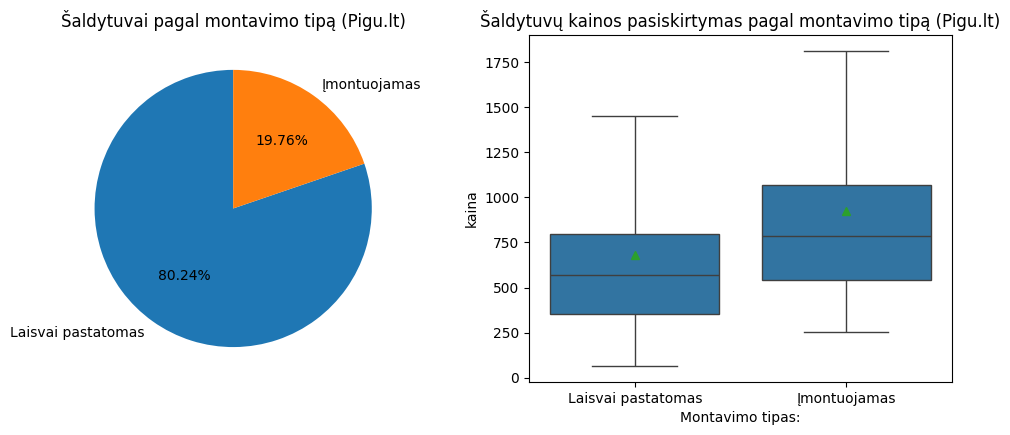

In [41]:
c = df['Montavimo tipas:'].value_counts()
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.5))
ax1.pie(c.values, labels=c.index, autopct='%.2f%%', startangle=90)
sns.boxplot(data=df, x='Montavimo tipas:', y='kaina', ax=ax2, showmeans=True, showfliers=False)
ax1.set_title('Šaldytuvai pagal montavimo tipą (Pigu.lt)')
ax2.set_title('Šaldytuvų kainos pasiskirtymas pagal montavimo tipą (Pigu.lt)')
fig.tight_layout()
plt.show()

In [42]:
# Šaldytuvų tipai Pigu.lt
SDB = sqlite3.connect('VarlePigu.db')
Cs = SDB.cursor()

sql="""SELECT kaina,
`Šaldytuvo tipas:`
FROM "SaldytuvaiPigu";
"""
df = pd.read_sql_query(sql, con=SDB)
SDB.close()

df.head()

,kaina,Šaldytuvo tipas:
0,198.49,Šaldytuvas su šaldikliu viršuje
1,284.00,Šaldytuvas su šaldikliu apačioje
2,396.00,Šaldytuvas su šaldikliu apačioje
3,375.00,Šaldytuvas su šaldikliu apačioje
4,303.00,Šaldytuvas su šaldikliu apačioje


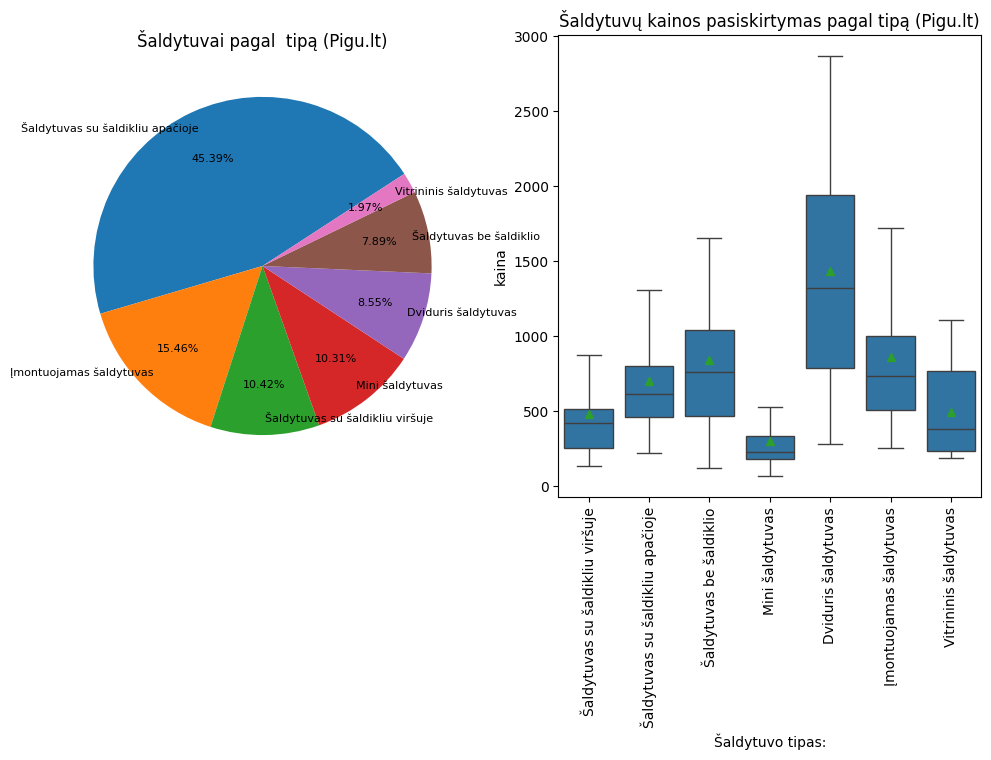

In [43]:
c = df['Šaldytuvo tipas:'].value_counts()
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.pie(c.values, labels=c.index, autopct='%.2f%%', startangle=33, pctdistance=0.7, labeldistance = 0.9, textprops={'fontsize':8, 'color': 'black'})
sns.boxplot(data=df, x='Šaldytuvo tipas:', y='kaina', ax=ax2, showmeans=True, showfliers=False)
ax1.set_title('Šaldytuvai pagal  tipą (Pigu.lt)')
ax2.set_title('Šaldytuvų kainos pasiskirtymas pagal tipą (Pigu.lt)')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

fig.tight_layout()
plt.show()

In [44]:
# Šaldytuvų tūris Pigu.lt
SDB = sqlite3.connect('VarlePigu.db')
Cs = SDB.cursor()

sql="""SELECT kaina,
`Bendra talpa:`
FROM "SaldytuvaiPigu";
"""
df = pd.read_sql_query(sql, con=SDB)
SDB.close()

df.head()

,kaina,Bendra talpa:
0,198.49,124 l
1,284.00,262 l
2,396.00,316 l
3,375.00,355 l
4,303.00,291 l


In [45]:
def set_talpa(x):
    if x is not None:
        return float(x.replace('l', ''))
    
df['talpa'] = df['Bendra talpa:'].apply(set_talpa)
df.dropna(subset='talpa', inplace=True)
df['talpa2'] = df['talpa'].apply(lambda x: int(np.ceil(x/10) * 10))


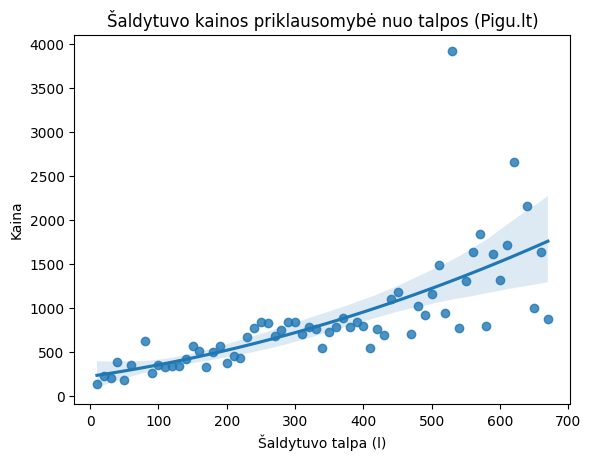

In [46]:
dfv = df[['kaina', 'talpa2']]

dfv_gr = dfv.groupby('talpa2').mean(numeric_only=True).round().reset_index()
dfv_gr.head()
sns.regplot(data=dfv_gr, x='talpa2', y='kaina', order=2)
plt.title('Šaldytuvo kainos priklausomybė nuo talpos (Pigu.lt)')
plt.ylabel('Kaina')
plt.xlabel('Šaldytuvo talpa (l)')
plt.show()

In [47]:
# Šaldytuvų energijos klase Pigu.lt
SDB = sqlite3.connect('VarlePigu.db')
Cs = SDB.cursor()

sql="""SELECT kaina,
`Energijos klasė:`
FROM "SaldytuvaiPigu";
"""
df = pd.read_sql_query(sql, con=SDB)
SDB.close()

df.head()

,kaina,Energijos klasė:
0,198.49,E
1,284.00,E
2,396.00,E
3,375.00,E
4,303.00,E


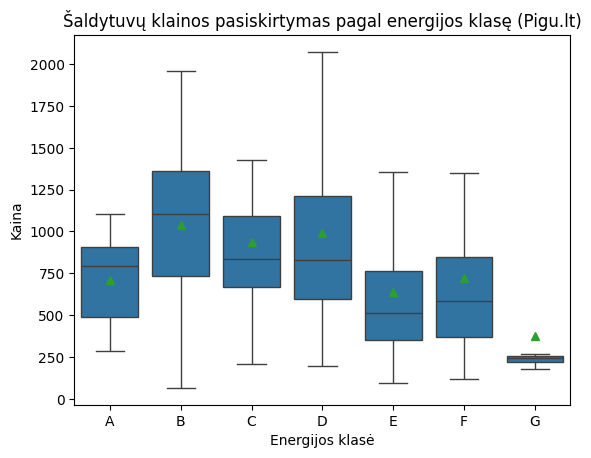

In [ ]:
df.dropna(subset='Energijos klasė:', inplace=True)
klases = sorted(list(set(df['Energijos klasė:'].tolist())))

sns.boxplot(data=df, x='Energijos klasė:', y='kaina', showmeans=True, showfliers=False, order=klases)
plt.title('Šaldytuvų kainos pasiskirtymas pagal energijos klasę (Pigu.lt)')
plt.xlabel('Energijos klasė')
plt.ylabel('Kaina')
plt.show()

In [52]:
# Šaldytuvai energijos sanaudos Pigu.lt
SDB = sqlite3.connect('VarlePigu.db')
Cs = SDB.cursor()

sql="""SELECT kaina,
`Energijos sąnaudos per metus:`
FROM "SaldytuvaiPigu";
"""
df = pd.read_sql_query(sql, con=SDB)
SDB.close()

df.head()

,kaina,Energijos sąnaudos per metus:
0,198.49,163 kWh
1,284.00,220 kWh
2,396.00,247.11 kWh
3,375.00,255.87 kWh
4,303.00,227 kWh


In [54]:
# def set_sanaudos(x):
#     if x is not None:
#         return float(x.replace('[^0-9]', ''))
    
# df['sanaudos'] = df['Energijos sąnaudos per metus:'].apply(set_sanaudos)

df['sanaudos'] = df['Energijos sąnaudos per metus:'].str.extract('(\d+)')
df.head()
# df.dropna(subset='talpa', inplace=True)
# df['talpa2'] = df['talpa'].apply(lambda x: int(np.ceil(x/10) * 10))

,kaina,Energijos sąnaudos per metus:,sanaudos
0,198.49,163 kWh,163
1,284.00,220 kWh,220
2,396.00,247.11 kWh,247
3,375.00,255.87 kWh,255
4,303.00,227 kWh,227


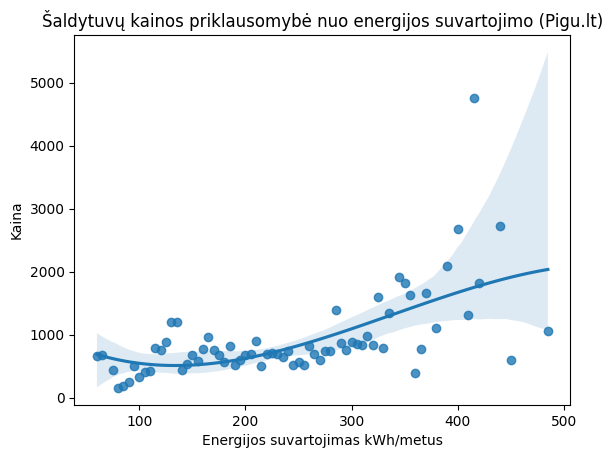

In [68]:
df.dropna(subset='sanaudos', inplace=True)
df['sanaudos'] = df['sanaudos'].apply(lambda x: int(x))
dfe = df[['kaina', 'sanaudos']]

dfe['E'] = dfe['sanaudos'].apply(lambda x: int(np.ceil(x/5) * 5))

dfe_gr = dfe.groupby('E').mean(numeric_only=True).round().reset_index()
dfe_filtered = dfe_gr[(dfe_gr['E'] > 0) & (dfe_gr['E'] < 500)]

sns.regplot(data=dfe_filtered, x='E', y='kaina', order=3)
plt.title('Šaldytuvų kainos priklausomybė nuo energijos suvartojimo (Pigu.lt)')
plt.ylabel('Kaina')
plt.xlabel('Energijos suvartojimas kWh/metus')
plt.show()

In [86]:
# Šaldytuvai garsas/triukšmas Pigu.lt
SDB = sqlite3.connect('VarlePigu.db')
Cs = SDB.cursor()

sql="""SELECT kaina,
`Maksimalus triukšmo lygis:`
FROM "SaldytuvaiPigu";
"""
df = pd.read_sql_query(sql, con=SDB)
SDB.close()

df.head()

,kaina,Maksimalus triukšmo lygis:
0,198.49,36 dB
1,284.00,38 dB
2,396.00,37 dB
3,375.00,37 dB
4,303.00,35 dB


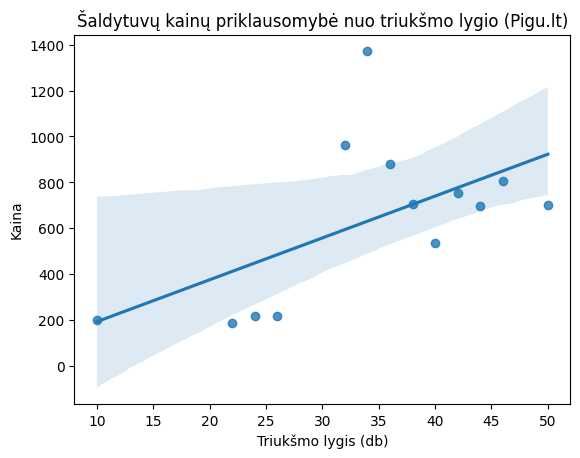

In [91]:
df['garsas'] = df['Maksimalus triukšmo lygis:'].str.extract('(\d+)')
df.dropna(subset='garsas', inplace=True)
df['garsas'] = df['garsas'].apply(lambda x: int(x))

dfg = df[['kaina', 'garsas']]
dfg['g2'] = dfg['garsas'].apply(lambda x: int(np.ceil(x/2) * 2))

dfg_gr = dfg.groupby('g2').mean(numeric_only=True).round().reset_index()
fig, ax = plt.subplots()
sns.regplot(data=dfg_gr, x='g2', y='kaina', order=1)
ax.set_xlabel('Triukšmo lygis (db)')
ax.set_ylabel('Kaina')
plt.title('Šaldytuvų kainų priklausomybė nuo triukšmo lygio (Pigu.lt)')
plt.show()

In [92]:
# Šaldytuvai valdymas Pigu.lt
SDB = sqlite3.connect('VarlePigu.db')
Cs = SDB.cursor()

sql="""SELECT kaina,
`Valdymas:`
FROM "SaldytuvaiPigu";
"""
df = pd.read_sql_query(sql, con=SDB)
SDB.close()

df.head()

,kaina,Valdymas:
0,198.49,Mechaninis
1,284.00,Mechaninis
2,396.00,Elektroninis
3,375.00,Sensorinis
4,303.00,Mechaninis


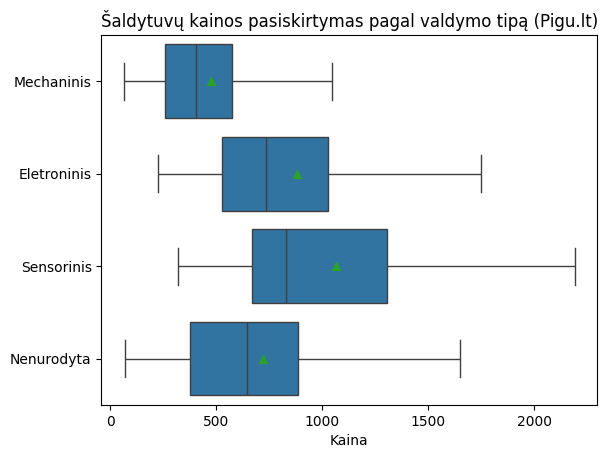

In [96]:
def set_valdymas(x):
    if x is not None:
        if 'Elek' in x:
            return 'Eletroninis'
        else:
            return x
        
df['Valdymas:'] = df['Valdymas:'].apply(set_valdymas)

fig, ax = plt.subplots()
sns.boxplot(data=df, y='Valdymas:', x='kaina', showmeans=True, showfliers=False)
# sns.barplot(data=dfv_gr, y='newVald', x='kaina', orient='h')
# for container in ax.containers:
#     ax.bar_label(container)
plt.ylabel('')
plt.xlabel('Kaina')
plt.title('Šaldytuvų kainos pasiskirtymas pagal valdymo tipą (Pigu.lt)')
plt.show()

In [99]:
# Gamintojai Pigu.LT
SDB = sqlite3.connect('VarlePigu.db')
Cs = SDB.cursor()

sql="""SELECT kaina, 
`Prekės ženklas:`,
`Spalva:`
FROM "SaldytuvaiPigu";
"""
df = pd.read_sql_query(sql, con=SDB)
SDB.close()
df.head()

,kaina,Prekės ženklas:,Spalva:
0,198.49,Gorenje,Balta
1,284.00,Beko,Pilka
2,396.00,Beko,Pilka
3,375.00,Beko,Pilka
4,303.00,Beko,Balta


In [ ]:
def set_spalva(x):
    if x is not None:
        if 'Juod' in x:
            return 'Juoda'
        elif 'Balt' in x:
            return 'Balta'
        else:
            return x
        
df['spalva'] = df['Spalva:'].apply(set_spalva)


spalva
Balta      432
Pilka      299
Juoda      134
Raudona     23
Smėlio      14
Žalia        6
Mėlyna       3
Rožinė       1
Name: count, dtype: int64


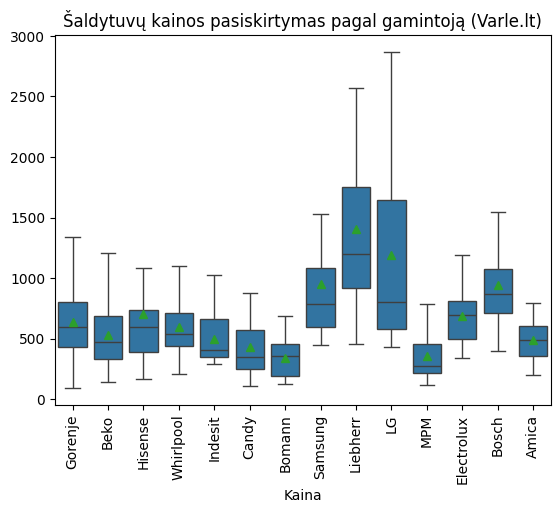

In [104]:
brand_counts = df['Prekės ženklas:'].value_counts()
brands_to_plot = brand_counts[brand_counts > 20].index

df_gamintojas = df[df['Prekės ženklas:'].isin(brands_to_plot)][['kaina', 'Prekės ženklas:']]
# df_gamintojas_gr = df_gamintojas.groupby('gamintojas').mean().round()
fig, ax = plt.subplots()
sns.boxplot(data=df_gamintojas, y='kaina', x='Prekės ženklas:', showfliers=False, showmeans=True)
plt.title('Šaldytuvų kainos pasiskirtymas pagal gamintoją (Varle.lt)')
plt.tick_params(axis='x', rotation=90)
plt.ylabel('')
plt.xlabel('Kaina')
plt.show()


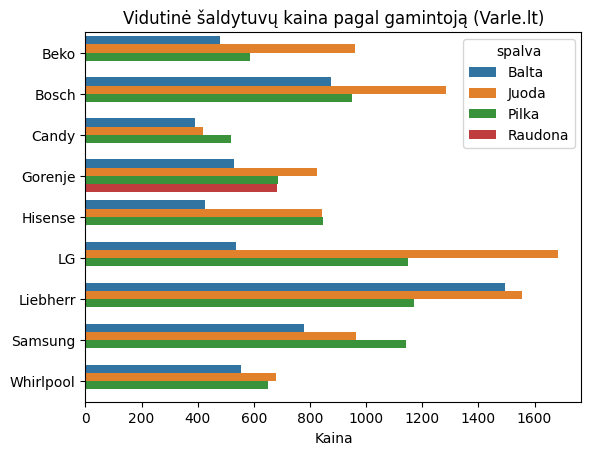

In [108]:
colors_counts = df['spalva'].value_counts()
colors_to_plot = colors_counts[colors_counts > 20].index
brand_counts = df['Prekės ženklas:'].value_counts()
brands_to_plot = brand_counts[brand_counts > 40].index

df_gamintojas = df[(df['Prekės ženklas:'].isin(brands_to_plot)) & df['spalva'].isin(colors_to_plot)][['kaina', 'Prekės ženklas:', 'spalva']]
df_gamintojas_gr = df_gamintojas.groupby(['Prekės ženklas:', 'spalva']).mean().round()
fig, ax = plt.subplots()
sns.barplot(data=df_gamintojas_gr, x='kaina', y='Prekės ženklas:', orient='h', hue='spalva')
# sns.boxplot(data=df_gamintojas, x='kaina', y='gamintojas', hue='spalva', showmeans=True, showfliers=False)
plt.title('Vidutinė šaldytuvų kaina pagal gamintoją (Varle.lt)')
plt.ylabel('')
plt.xlabel('Kaina')
plt.show()

In [ ]:
# Sample DataFrames (replace these with your actual data)
df_source1 = pd.DataFrame({
    'car_brand': ['Toyota', 'Honda', 'Ford', 'BMW', 'Audi'],
    'price': [25000, 22000, 28000, 50000, 55000]
})

df_source2 = pd.DataFrame({
    'car_brand': ['Toyota', 'Honda', 'Ford', 'BMW', 'Audi','MERC'],
    'price': [26000, 23000, 29000, 52000, 54000, 20000]
})

# Add a 'source' column to each DataFrame
df_source1['source'] = 'Source 1'
df_source2['source'] = 'Source 2'


# Concatenate both DataFrames
df_combined = pd.concat([df_source1, df_source2])
# df_combined
# Group by car_brand and source, and calculate the average price
# df_avg_price = df_combined.groupby(['car_brand', 'source'])['price'].mean().reset_index()

# # Create the seaborn barplot
# plt.figure(figsize=(8, 6))
# sns.barplot(x='car_brand', y='price', hue='source', data=df_avg_price)

# # Customize plot
# plt.title('Average Car Brand Prices from Different Sources')
# plt.xlabel('Car Brand')
# plt.ylabel('Average Price')

# # Show plot
# plt.xticks(rotation=45)  # Rotate x labels if needed
# plt.tight_layout()
# plt.show()

,car_brand,price,source
0,Toyota,25000,Source 1
1,Honda,22000,Source 1
2,Ford,28000,Source 1
3,BMW,50000,Source 1
4,Audi,55000,Source 1
0,Toyota,26000,Source 2
1,Honda,23000,Source 2
2,Ford,29000,Source 2
3,BMW,52000,Source 2
4,Audi,54000,Source 2
